<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C1/W2/ungraded_labs/C1_W2_Lab_1_beyond_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.14.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

Display an Image


LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 

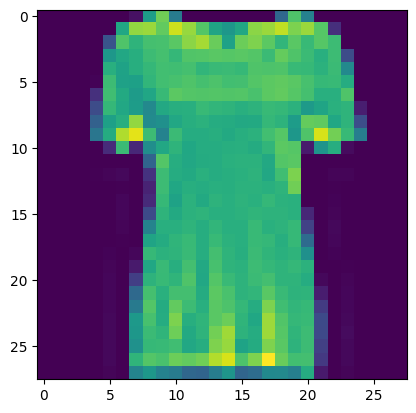

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 10

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [9]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [29]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do.


In [30]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 821us/step - loss: 1.0816 - accuracy: 0.6640
Epoch 2/100
1875/1875 [==============================] - 2s 805us/step - loss: 0.6341 - accuracy: 0.7713
Epoch 3/100
1875/1875 [==============================] - 2s 840us/step - loss: 0.5592 - accuracy: 0.7997
Epoch 4/100
1875/1875 [==============================] - 2s 837us/step - loss: 0.5172 - accuracy: 0.8164
Epoch 5/100
1875/1875 [==============================] - 2s 817us/step - loss: 0.4899 - accuracy: 0.8268
Epoch 6/100
1875/1875 [==============================] - 2s 815us/step - loss: 0.4703 - accuracy: 0.8349
Epoch 7/100
1875/1875 [==============================] - 2s 823us/step - loss: 0.4555 - accuracy: 0.8401
Epoch 8/100
1875/1875 [==============================] - 2s 839us/step - loss: 0.4431 - accuracy: 0.8439
Epoch 9/100
1875/1875 [==============================] - 2s 813us/step - loss: 0.4337 - accuracy: 0.8467
Epoch 10/100
1875/1875 [==============================]

In [13]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 368us/step - loss: 0.5098 - accuracy: 0.8142


[0.5097666382789612, 0.8141999840736389]

Prediction

In [17]:
classifications = model.predict(test_images)

313/313 [==============================] - 0s 366us/step


In [22]:
index = 10
print(classifications[index])
Y_test_pred = np.argmax(classifications[index])
print(np.max(classifications[index]))
print(Y_test_pred)
print(test_labels[index])

[1.05117820e-03 2.76851933e-02 3.17033082e-01 2.81215855e-03 5.56562960e-01 4.93085281e-06 9.47490185e-02 4.37844427e-10 1.01324345e-04 2.07786968e-07]
0.55656296
4
4
